In [383]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import EAM_Fitting_Serial
import Handle_PotFiles
import time
import glob
os.chdir('/Users/cd8607/Documents/Lammps_MD')

n = 2

cov_base = np.array([4, 8, 16])

mean_base = np.array([0 ,0, 0])

cov_base = np.hstack([cov_base for i in range(n)])

mean_base = np.hstack([mean_base for i in range(n)])

In [384]:
txt = '      0.000000000000      69.391458840000  xlo xhi'

[_str for _str in txt.split(' ') if _str != '']

['0.000000000000', '69.391458840000', 'xlo', 'xhi']

In [385]:
files = glob.glob('EAM_Fit_Files/Atom_Files/*.atom')

for file in files:
    with open(file, 'r') as rfile:
        lines = rfile.readlines()

    lines[1] = '0\n'

    with open(file, 'w') as wfile:
        wfile.writelines(lines)

In [386]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')
pot2, potlines2, pot_params2 = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')

n_knots = {}
n_knots['He_F'] = 2
n_knots['He_p'] = 0
n_knots['W-He'] = 4
n_knots['He-He'] = 3
n_knots['H-He'] = 0

eam_fit = EAM_Fitting_Serial.Fit_EAM_Potential(pot, n_knots, pot_params, potlines, None, 0, '')
sample = np.loadtxt('sample.txt')
print(sample)

coef_dict = eam_fit.fit_sample(sample)

print(sample[eam_fit.map['He_F']])
# x_plt = np.linspace(0, 6, 1000)

# y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He_p'], eam_fit.knot_pts['He_p'])

# plt.plot(x_plt, y_plt)


t1 = time.perf_counter()
eam_fit.sample_to_file(sample)
t2 = time.perf_counter()
print(t2-t1)

[i % 2 for i in np.arange(10)]

[ 0.36082425 -0.24162631 -1.35231212  0.25306422 -0.17743085  0.5622543
 -0.04241508  0.02142859 -0.50593043  0.65562643  0.96530833 -2.77716751
 -0.4213319  -0.6418776   2.3077079 ]
[0.36082425]
0.03037554200273007


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

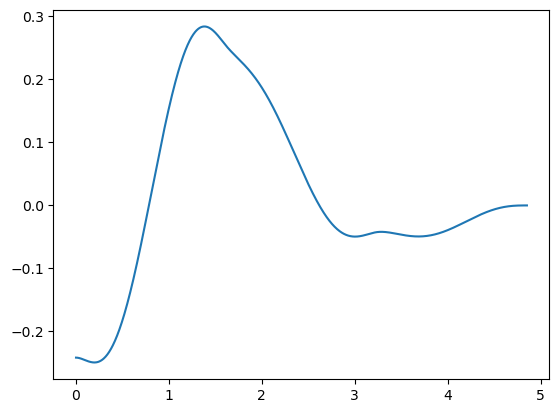

In [387]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')

x_plt = np.linspace(0, 20, 1000)

y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He_F'], eam_fit.knot_pts['He_F'])
r = np.linspace(0,eam_fit.pot_params['rc'],eam_fit.pot_params['Nr'])

# plt.plot(x_plt, y_plt)
plt.plot(r, pot['He_p'])
# plt.plot(pot2['He_F'])

# plt.plot(x_plt, sample[0]*np.sqrt(x_plt))

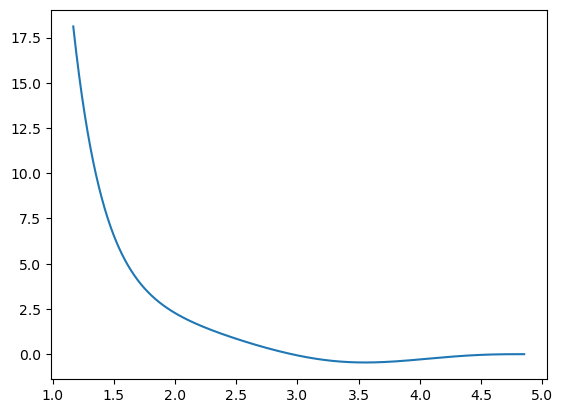

In [388]:
x_plt = np.linspace(1, 5, 1000)
zbl = EAM_Fitting_Serial.ZBL(74, 2)
r = np.linspace(0,eam_fit.pot_params['rc'],eam_fit.pot_params['Nr'])[1:]

y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['W-He'], eam_fit.knot_pts['W-He'])


w_he = pot['W-He'][1:]/r

plt.plot(r[300:],w_he[300:])

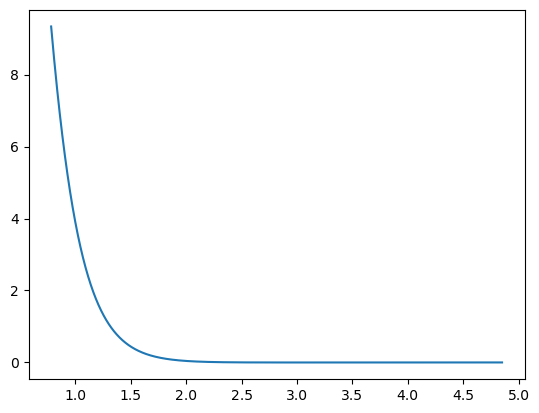

In [389]:
x_plt = np.linspace(1, 5, 1000)
zbl = EAM_Fitting_Serial.ZBL(74, 2)
r = np.linspace(0,eam_fit.pot_params['rc'],eam_fit.pot_params['Nr'])[1:]
y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He-He'], eam_fit.knot_pts['He-He'])

he_he = pot['He-He'][1:]/r

plt.plot(r[200:],he_he[200:])

In [390]:
pot2, potlines2, pot_params2 = Handle_PotFiles.read_pot('git_folder/Potentials/WHHe_test.eam.alloy')
print(potlines)
print(pot_params)
print(pot_params2)

pot_new = {}

for key in pot2.keys():
    pot_new[key] = pot2[key][::4]

Handle_PotFiles.write_pot(pot_new, potlines, 'git_folder/Potentials/beck.eam.alloy')

# W-H-He potential 
# 
# 
3 W H He 
   2500    0.0079168464    1250    0.0038811112    4.8513889200
74  183.84        3.14484257 BCC
1  1.008        0.74368788 DIMER
2  4.0026        10.14484257  DIMER

{'Nrho': 2500, 'drho': 0.0079168464, 'Nr': 1250, 'dr': 0.0038811112, 'rc': 4.85138892, 'rho_c': 19.792116}
{'Nrho': 10000, 'drho': 0.0019792116, 'Nr': 5000, 'dr': 0.0009702778, 'rc': 4.85138892, 'rho_c': 19.792116}


/var/folders/s9/zg8t26bx2xg094_h3_f559v40000gp/T/ipykernel_17911/3785717759.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h_he[i] = he_h_potential(_r, zbl_hhe)


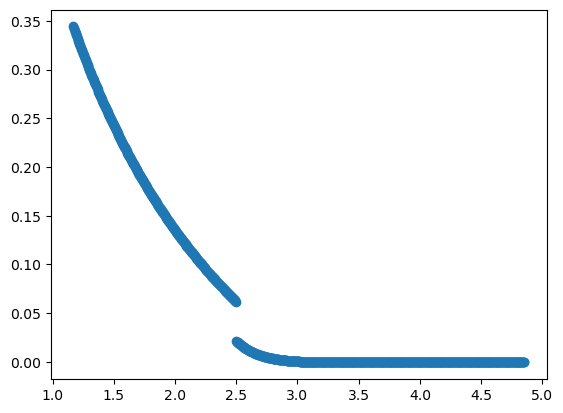

In [391]:
def he_h_potential(r, zbl):
    D0 = -0.318151 
    D1 = 1.142826 
    D2 = -0.530526 
    D3 = 0.116766 
    sigma = 3.0862 
    e = 0.0006 
    r1 = 0.5 
    r2 = 2.5

    if r < r1:
        return zbl.eval_zbl(r)
    
    elif r1 < r < r2:
        return D0 + D1/r + D2/r**2 + D3/r**3
    
    else:
        return 4*e*( (sigma/r) **12 - (sigma/r) ** 6)
    
zbl_hhe = EAM_Fitting_Serial.ZBL(2, 1)

r = np.linspace(0,eam_fit.pot_params['rc'],eam_fit.pot_params['Nr'])[1:]

h_he = np.zeros(r.shape)

for i, _r in enumerate(r):
    h_he[i] = he_h_potential(_r, zbl_hhe)

plt.scatter(r[300:], h_he[300:])